# Experiments with PCA
 - Dataset: [SVNH Dataset](http://ufldl.stanford.edu/housenumbers/) (Format 2)

#### a) Perform PCA on SVHN data set. Find how many top eigenvectors are required to keep the proportion of variance above 0.9. Plot PoV against number of eigenvectors.

In [62]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np

### Data Preparation

In [63]:
train_data = './data/train_32x32.mat'
test_data = './data/test_32x32.mat'

train = sio.loadmat(train_data)
test = sio.loadmat(test_data)

train_X, train_y = train['X'], train['y']
test_X, test_y = test['X'], test['y']

print(f'Before reshaping: train_X: {train_X.shape}, train_y: {train_y.shape}')
print(f'Before reshaping: test_X: {test_X.shape}, test_y: {test_y.shape}')

# Reshape the data to NxHxWxC
train_X = train_X.transpose((3, 0, 1, 2))
test_X = test_X.transpose((3, 0, 1, 2))
# Make test_y and train_y into a 1D array
train_y = train_y.reshape(-1)
test_y = test_y.reshape(-1)

# Change all the 10s in the labels to 0s
train_y[train_y == 10] = 0
test_y[test_y == 10] = 0

print(f'After reshaping: train_X: {train_X.shape}, train_y: {train_y.shape}')
print(f'After reshaping: test_X: {test_X.shape}, test_y: {test_y.shape}')

Before reshaping: train_X: (32, 32, 3, 73257), train_y: (73257, 1)
Before reshaping: test_X: (32, 32, 3, 26032), test_y: (26032, 1)
After reshaping: train_X: (73257, 32, 32, 3), train_y: (73257,)
After reshaping: test_X: (26032, 32, 32, 3), test_y: (26032,)


Image shape: (32, 32, 3), Label: 0


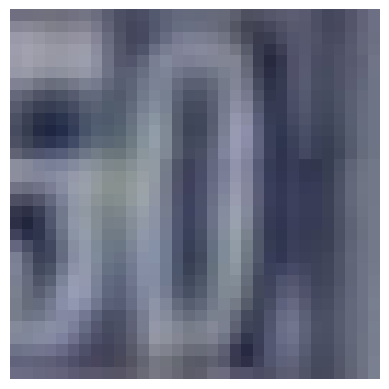

In [67]:
image, label = train_X[3], train_y[3]
print(f'Image shape: {image.shape}, Label: {label}')

# Visualise image with matplotlib
plt.imshow(image)
plt.axis('off')
plt.show()

In [65]:
# Pick 2500 samples from each class
print(f'min: {np.min(train_y)}, max: {np.max(train_y)}')
X_samples, y_samples = [], []
for i in range(10):
    indices = np.where(train_y == i)[0]
    random_indices = np.random.choice(indices, 2500, replace=False)
    X_samples.append(train_X[random_indices])
    y_samples.append(train_y[random_indices])

train_X, train_y = np.concatenate(X_samples), np.concatenate(y_samples)
print(f'After sampling: train_X: {train_X.shape}, train_y: {train_y.shape}')

min: 0, max: 9
After sampling: train_X: (25000, 32, 32, 3), train_y: (25000,)


### PCA

In [69]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
pca.fit(train_X.reshape(train_X.shape[0], -1))
print(pca.components_.shape)

(3072, 3072)


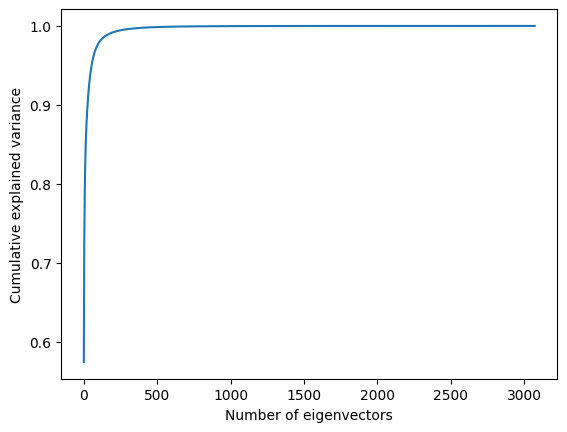

In [72]:
# Plot POV
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of eigenvectors')
plt.ylabel('Cumulative explained variance')
plt.show()

In [73]:
# Find out how many eigenvectors constitute a POV of 0.9
num = 1
for i in np.cumsum(pca.explained_variance_ratio_):
    if i > 0.9:
        break
    num += 1
print(num)

27


### Visualize top 10 eigenvectors and provide reconstruction of 10 SVHN samples (one from each class) using top 10 eigenvectors.

In [77]:
def min_max_normalise(X):
    """Normalize X to constrain all values between 0 and 1"""
    return (X - np.min(X)) / (np.max(X) - np.min(X))

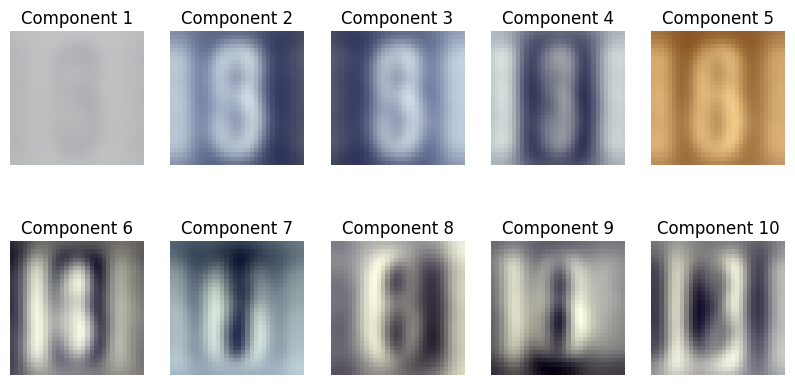

In [78]:
top_10 = min_max_normalise(pca.components_[:10])

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for i, ax in enumerate(axes.flat):
    ax.imshow(top_10[i].reshape(32, 32, 3))
    ax.axis('off')
    ax.set_title(f'Component {i+1}')
plt.show()

### Reconstruction using top 10 eigenvectors

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [83]:
# Find indexes of 1 sample from each class
indices = []
for i in range(10):
    indices.append(np.where(train_y == i)[0][0])


# PCA for 10 components
pca = PCA(n_components=10)
pca.fit(train_X.reshape(train_X.shape[0], -1))
print(pca.components_)
print(pca.explained_variance_ratio_)

[[ 0.01768259  0.01834968  0.01893416 ...  0.01688765  0.01752874
   0.01806007]
 [-0.00287713  0.00139717  0.00940335 ... -0.02745424 -0.02563955
  -0.01681176]
 [-0.02639069 -0.0249585  -0.01564895 ...  0.00356634  0.00818397
   0.01600601]
 ...
 [-0.0051784  -0.00593884 -0.0023402  ...  0.02809198  0.02842438
   0.02109382]
 [-0.01218202 -0.0127704  -0.00960691 ... -0.02812973 -0.02930409
  -0.02589182]
 [-0.0074669  -0.00861966 -0.00791349 ...  0.01402343  0.01442464
   0.01516944]]
0.820081428022831


In [84]:
X_projected = pca.inverse_transform(train_X.reshape(train_X.shape[0], -1))
X_projected2 = (train_X.reshape(train_X.shape[0], -1).dot(pca.components_) + pca.mean_).reshape(train_X.shape)

fig, axes = plt.subplots(2, 10, figsize=(10, 2))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_projected[indices[i]].reshape(32, 32, 3))
    ax.axis('off')
    ax.set_title(f'Component {i+1}')

ValueError: shapes (25000,3072) and (10,3072) not aligned: 3072 (dim 1) != 10 (dim 0)